Link to lesson: https://carpentries-incubator.github.io/SDC-BIDS-fMRI/06-apply-a-parcellation/index.html

# Applying Parcellation
## Retrieving the Atlas

In [23]:
import numpy as np
import nibabel as nib
from nilearn import datasets #provides nilearn example datasets as well as brain parcellation atlases
from nilearn import image as img
from nilearn import plotting
import matplotlib.pyplot as plt

In [2]:
parcel_dir = '../resources/rois/'
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011(parcel_dir)

In [12]:
atlas_yeo_2011.keys()

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])

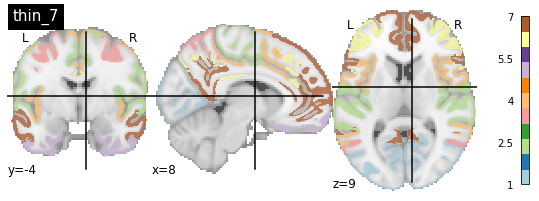

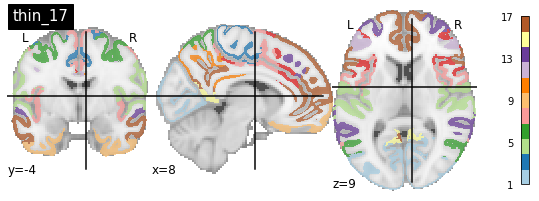

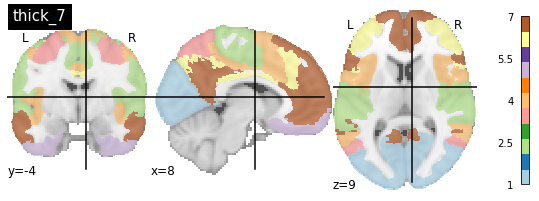

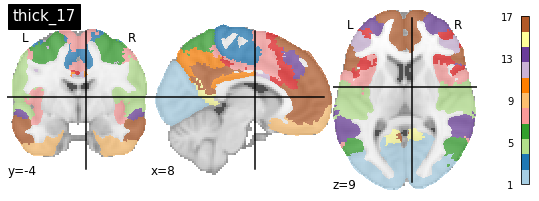

In [7]:
#Define where to slice the image
coords=(8, -4, 9)
#Show a colorbar
colorbar=True
#Color scheme to show when viewing image
cmap='Paired'

#Plot all parcellation schemas referred to by atlas_yeo_2011
plotting.plot_roi(atlas_yeo_2011['thin_7'], cut_coords=coords, colorbar=colorbar, cmap=cmap, title='thin_7')
plotting.plot_roi(atlas_yeo_2011['thin_17'], cut_coords=coords, colorbar=colorbar, cmap=cmap, title='thin_17')
plotting.plot_roi(atlas_yeo_2011['thick_7'], cut_coords=coords, colorbar=colorbar, cmap=cmap, title='thick_7')
plotting.plot_roi(atlas_yeo_2011['thick_17'], cut_coords=coords, colorbar=colorbar, cmap=cmap, title='thick_17')

# Spatial Separation of Network

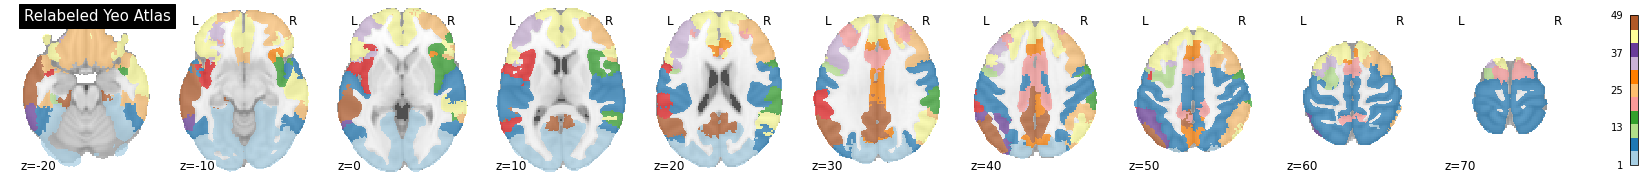

In [17]:
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo_2011['thick_7'])
plotting.plot_roi(region_labels,
                  cut_coords=(-20,-10,0,10,20,30,40,50,60,70),
                  display_mode='z',
                  colorbar=True,
                  cmap='Paired',
                  title='Relabeled Yeo Atlas')

## Resampling the Atlas

In [18]:
region_labels.to_filename('../resources/rois/yeo_2011/Yeo_JNeurophysiol11_MNI152/relabeled_yeo_atlas.nii.gz')

In [19]:
func_file = '../data/ds000030/derivatives/fmriprep/sub-10788/func/sub-10788_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
func_img = nib.load(func_file)

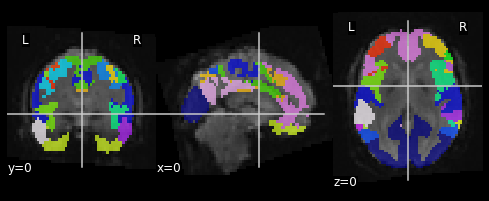

In [26]:
resamp_yeo = img.resample_to_img(region_labels, func_img, interpolation='nearest')
plotting.plot_roi(resamp_yeo, func_img.slicer[:,:,:,54], cut_coords=(0,0,0))


# Visualizing ROIs

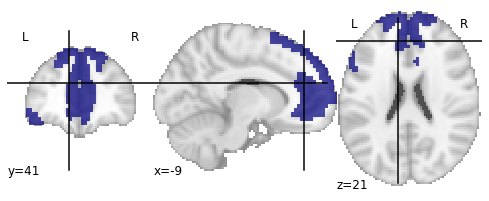

In [29]:
roi = 44
roi_mask = image.math_img('a == {}'.format(roi), a=resamp_yeo)
masked_resamp_yeo = image.math_img('a*b',a=resamp_yeo,b=roi_mask)
plotting.plot_roi(masked_resamp_yeo)

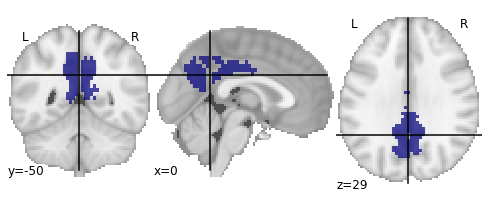

In [30]:
roi = 46
roi_mask = image.math_img('a == {}'.format(roi), a=resamp_yeo)
masked_resamp_yeo = image.math_img('a*b',a=resamp_yeo,b=roi_mask)
plotting.plot_roi(masked_resamp_yeo)